In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('beer-servings.csv')

In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia


In [5]:
data = data.drop(['country', 'continent'], axis=1)

In [6]:
corr_vals = data.corr()

In [7]:
corr_vals

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.467451,0.551206,0.839577
spirit_servings,0.467451,1.000000,0.197567,0.667581
wine_servings,0.551206,0.197567,1.000000,0.668988
total_litres_of_pure_alcohol,0.839577,0.667581,0.668988,1.000000


<Axes: >

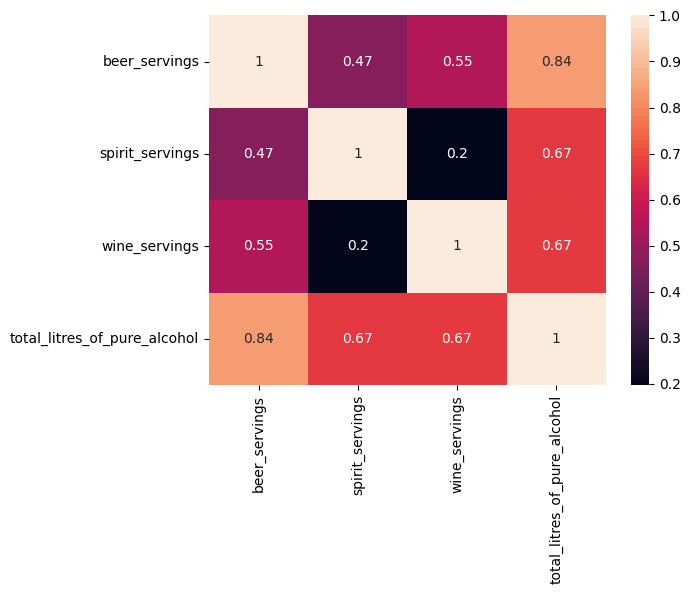

In [8]:
sns.heatmap(corr_vals, annot=True)

In [14]:
min_corr = corr_vals['total_litres_of_pure_alcohol'][:-1].min()

In [18]:
drop_threshold = 0.67

In [16]:
corr_vals['total_litres_of_pure_alcohol'][:-1]

,total_litres_of_pure_alcohol
beer_servings,0.839577
spirit_servings,0.667581
wine_servings,0.668988


In [17]:
corr_vals[corr_vals['total_litres_of_pure_alcohol']==min_corr].index.to_list()

['spirit_servings']

In [19]:
cols_to_drop= corr_vals[abs(corr_vals['total_litres_of_pure_alcohol'])<drop_threshold].index.to_list()

In [20]:
cols_to_drop

['spirit_servings', 'wine_servings']

In [21]:
# data = data.drop(cols_to_drop, axis=1)
data.drop(cols_to_drop, axis=1, inplace=True)

In [22]:
data

,beer_servings,total_litres_of_pure_alcohol
0,0.0,0.0
1,89.0,4.9
2,25.0,0.7
3,245.0,12.4
4,217.0,5.9
...,...,...
188,NaN,7.7
189,111.0,2.0
190,6.0,0.1
191,32.0,2.5
